In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
telco_base_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_base_data.shape

(7043, 21)

In [6]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'Count of target variable per category')

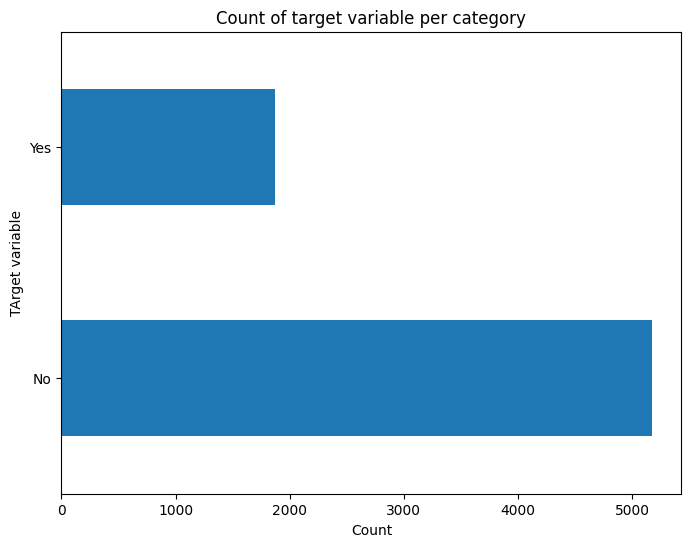

In [9]:
telco_base_data['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('Count')
plt.ylabel('TArget variable')
plt.title('Count of target variable per category')

In [10]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [11]:
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


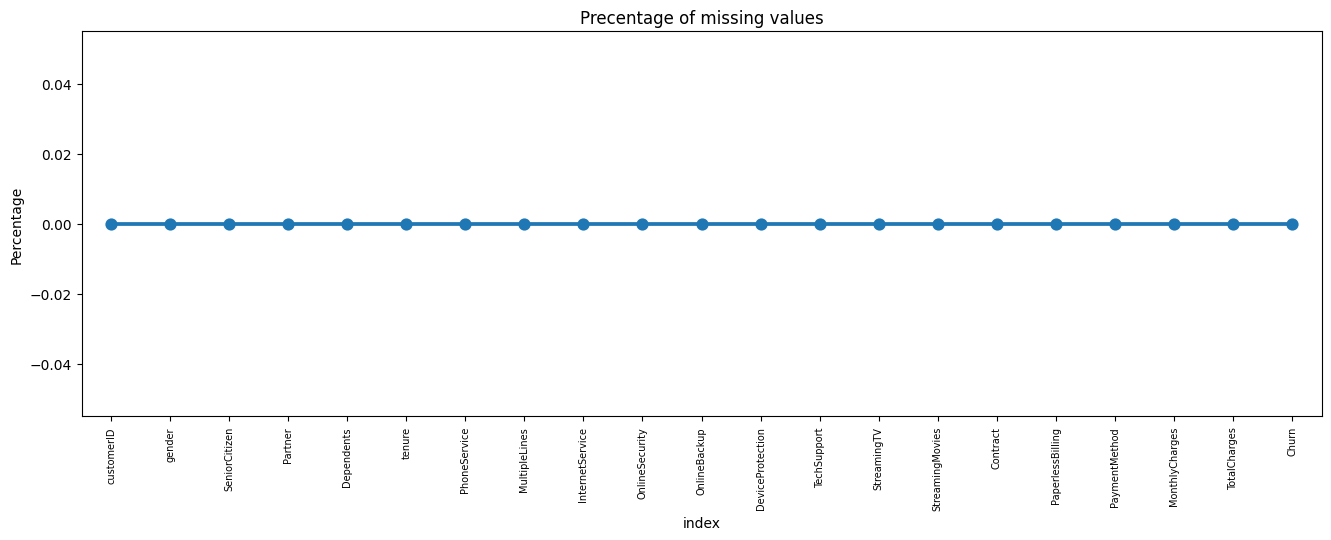

In [12]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax= sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('Precentage of missing values')
plt.ylabel('Percentage')
plt.show()

In [13]:
#Data cleaning
#create a copy of the data
telco_data = telco_base_data.copy()

In [14]:
#total charge should be numeric we should convert it into numeric data type

telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges,errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
#remove the missing data

telco_data.dropna(how='any',inplace=True)

In [17]:
print(telco_data['tenure'].max())

72


In [18]:
labels = ["{0} - {1} ".format(i,i+11) for i in range (1,72,12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure,range(1,80,12),right=False,labels=labels)

In [19]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12      2175
61 - 72     1407
13 - 24     1024
25 - 36      832
49 - 60      832
37 - 48      762
Name: count, dtype: int64

In [20]:
#drop th unnessary columns
telco_data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration
## Univariate analysis

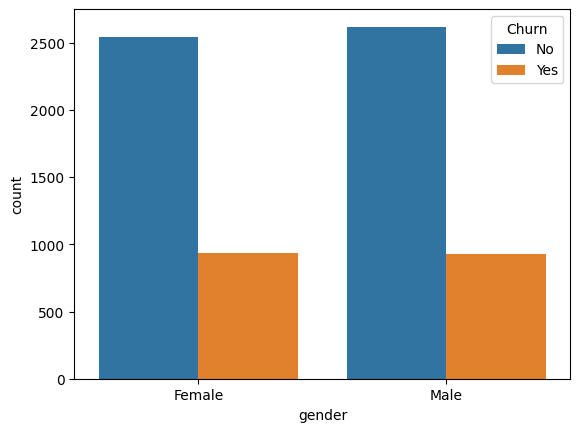

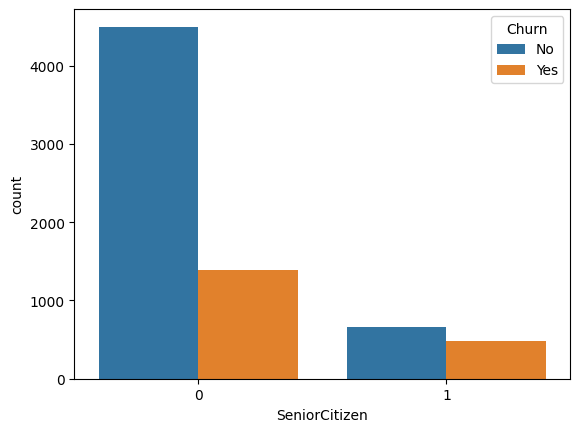

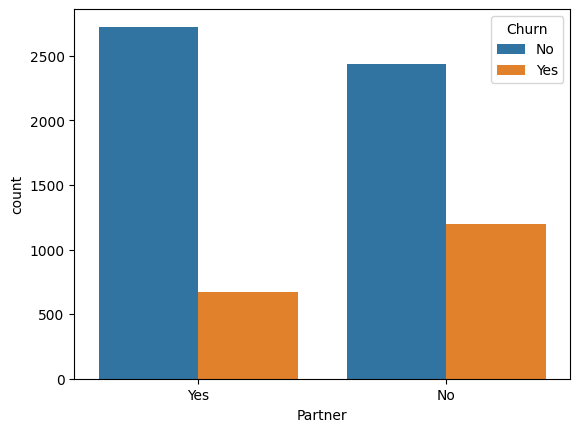

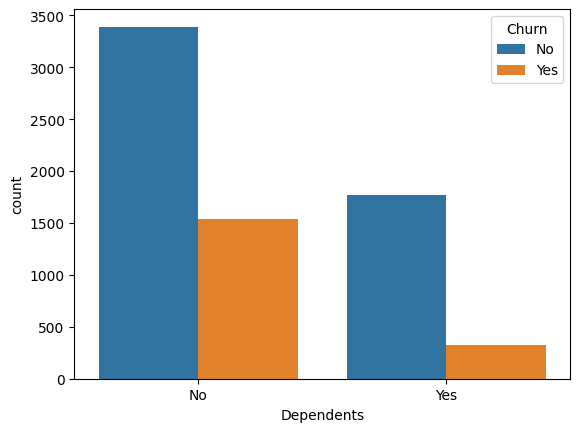

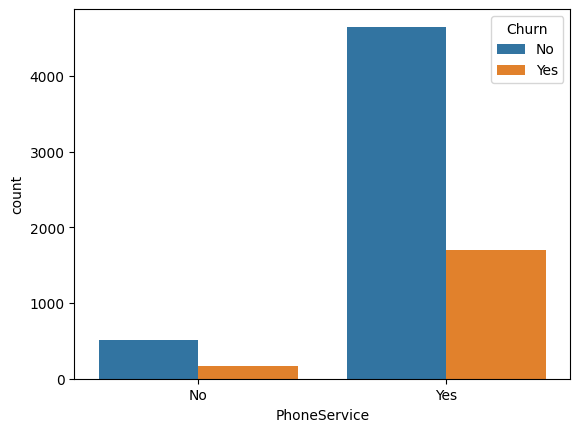

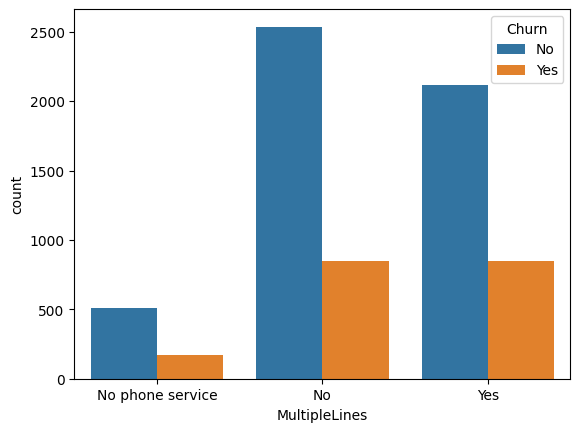

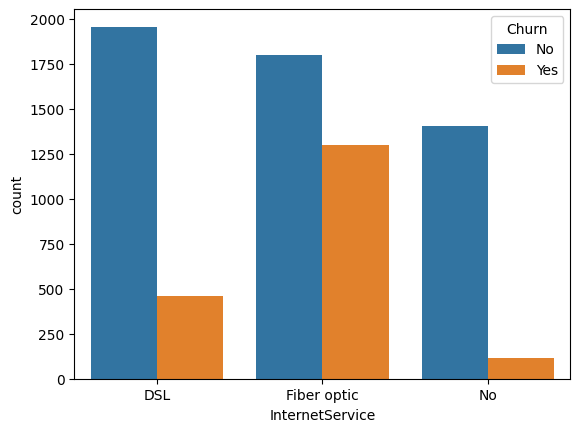

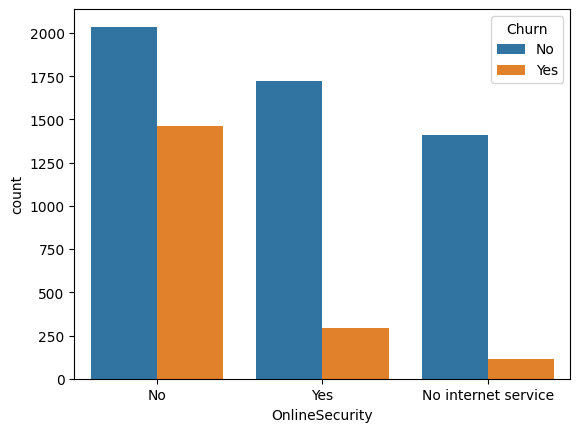

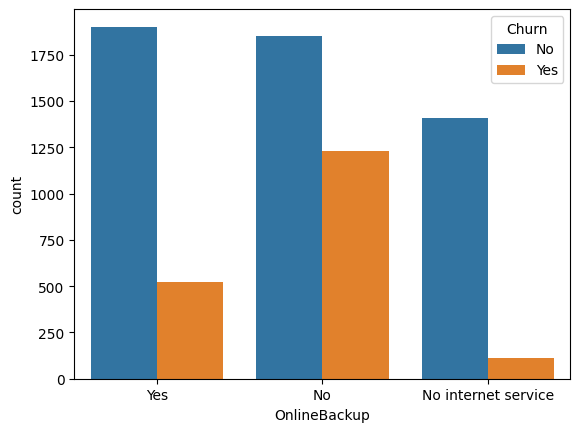

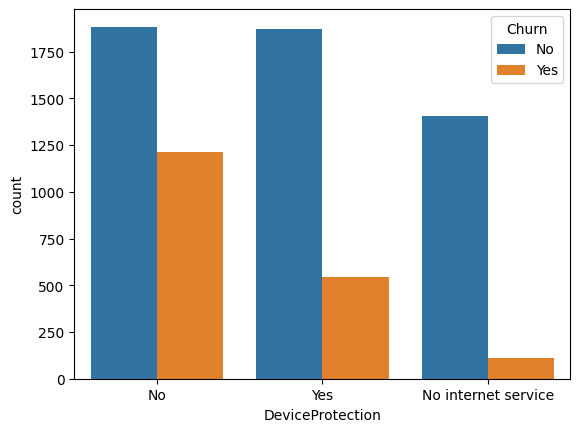

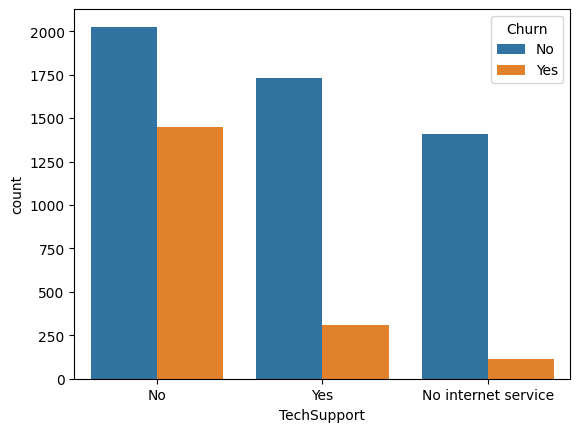

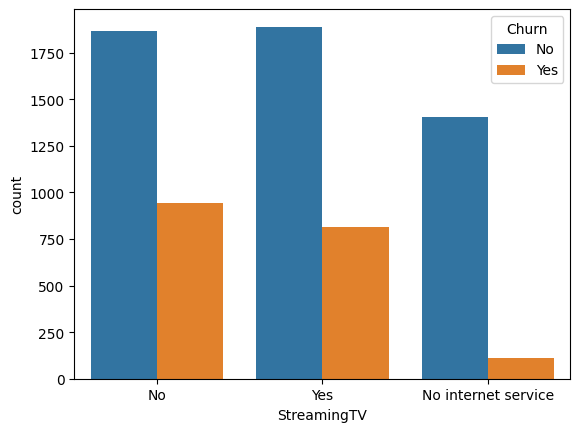

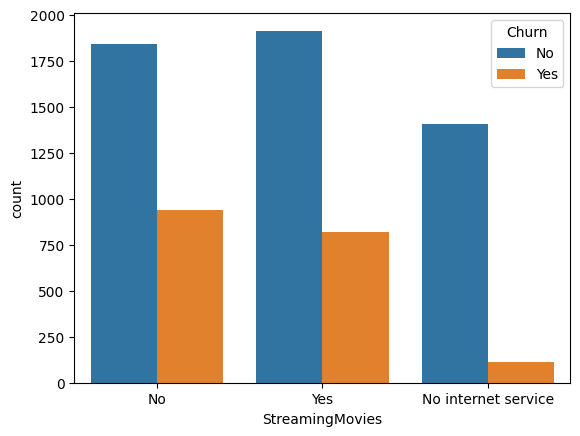

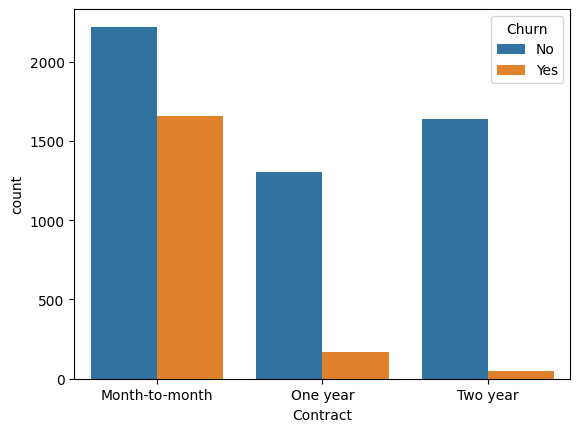

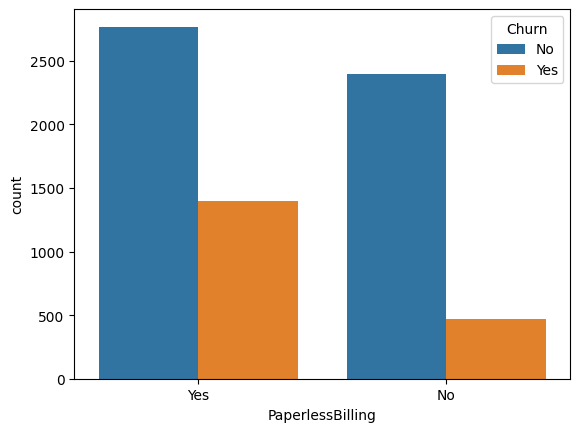

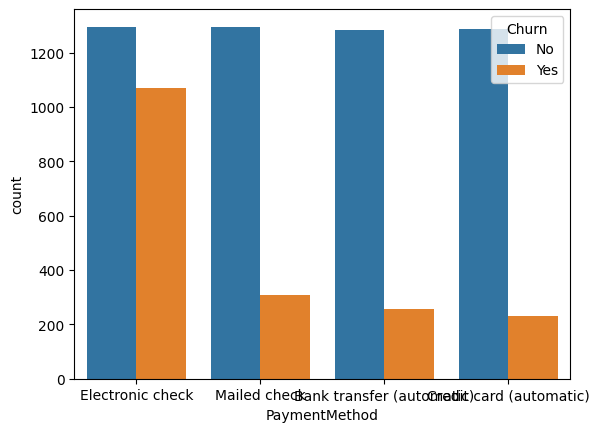

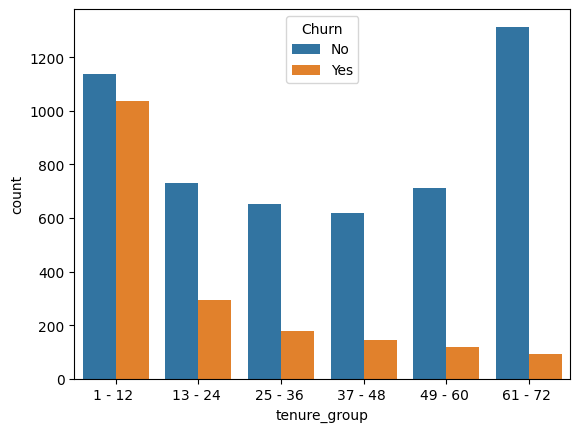

In [21]:
for i,predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data,x=predictor,hue='Churn')

In [22]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes' ,1,0)


In [23]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [24]:
telco_data['gender'] = telco_data['gender'].map({'Female':1,'Male':0})
telco_data['Partner'] = telco_data['Partner'].map({'Yes':1,'No':0})
telco_data['Dependents'] = telco_data['Dependents'].map({'Yes':1,'No':0})
telco_data['PhoneService'] = telco_data['PhoneService'].map({'Yes':1,'No':0})
telco_data['PaperlessBilling'] = telco_data['PaperlessBilling'].map({'Yes':1,'No':0})


In [25]:
telco_data['PhoneService'].value_counts()

PhoneService
1    6352
0     680
Name: count, dtype: int64

In [26]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,1,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,0,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,0,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,0,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,1,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12


In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',sparse_output=False)

encoded_telco_data = encoder.fit_transform(telco_data[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','tenure_group']])

In [28]:
encoded_telco_data_df = pd.DataFrame(encoded_telco_data,columns=encoder.get_feature_names_out(['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','tenure_group']))

In [29]:
encoded_telco_data_df.head()

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
cat_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','tenure_group']

In [31]:
telco_data_remaining = telco_data.drop(columns = cat_cols)

In [32]:
final_telco_data = pd.concat([telco_data_remaining.reset_index(drop=True),encoded_telco_data_df.reset_index(drop=True)],axis=1)

In [33]:
final_telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,1,0,1,0,0,1,29.85,29.85,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,1,0,56.95,1889.50,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0,0,1,1,53.85,108.15,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,42.30,1840.75,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,1,1,70.70,151.65,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
final_telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   MultipleLines_No phone service         7032 non-null   float64
 10  MultipleLines_Yes                      7032 non-null   float64
 11  Inte

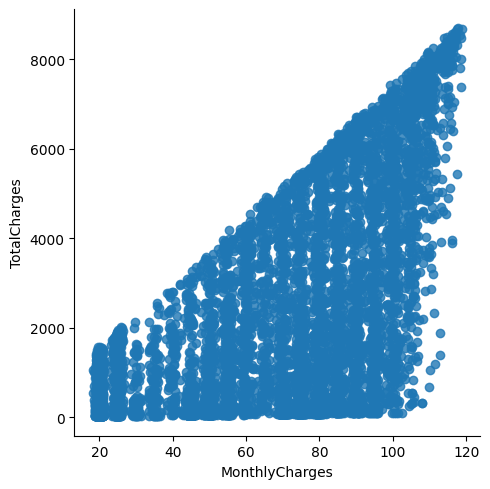

In [35]:
sns.lmplot(data=final_telco_data,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

Total Charges increaases as Montly Charges increase- as expected

C:\Users\mohan\AppData\Local\Temp\ipykernel_9764\2383039355.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(final_telco_data.MonthlyCharges[(final_telco_data['Churn']==0)],color='Red',shade=True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_9764\2383039355.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(final_telco_data.MonthlyCharges[(final_telco_data['Churn']==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Monthly charges by churn')

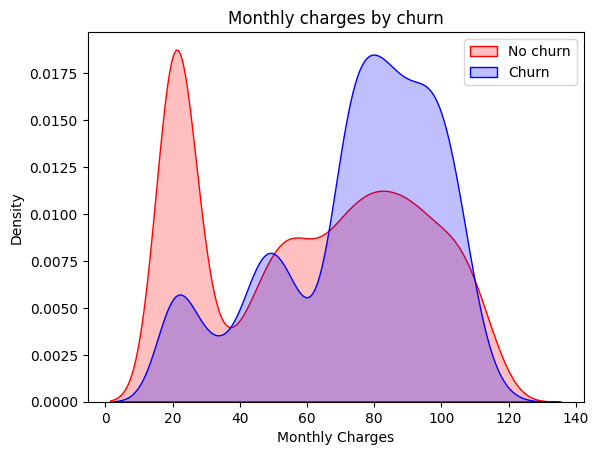

In [36]:
Mth = sns.kdeplot(final_telco_data.MonthlyCharges[(final_telco_data['Churn']==0)],color='Red',shade=True)
Mth = sns.kdeplot(final_telco_data.MonthlyCharges[(final_telco_data['Churn']==1)],color='Blue',shade=True)
Mth.legend(['No churn','Churn'],loc='upper right')
Mth.set_ylabel("Density")
Mth.set_xlabel("Monthly Charges")
Mth.set_title('Monthly charges by churn')


# Insights
Churn is high when Montly Charges are high

C:\Users\mohan\AppData\Local\Temp\ipykernel_9764\854965867.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(final_telco_data.TotalCharges[(final_telco_data['Churn']==0)],color='Red',shade=True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_9764\854965867.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(final_telco_data.TotalCharges[(final_telco_data['Churn']==1)],color='Blue',shade=True)


Text(0.5, 1.0, 'Monthly charges by churn')

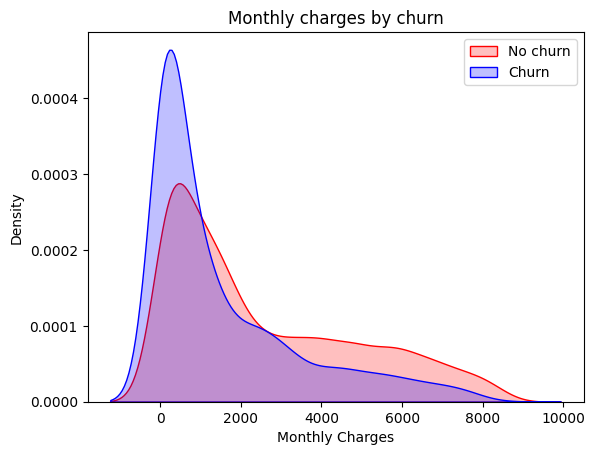

In [37]:
Tot = sns.kdeplot(final_telco_data.TotalCharges[(final_telco_data['Churn']==0)],color='Red',shade=True)
Tot = sns.kdeplot(final_telco_data.TotalCharges[(final_telco_data['Churn']==1)],color='Blue',shade=True)
Tot.legend(['No churn','Churn'],loc='upper right')
Tot.set_ylabel("Density")
Tot.set_xlabel("Monthly Charges")
Tot.set_title('Monthly charges by churn')


** Insights

Higher Churn at the lower Total Charges

How ever if we combine the insights of 3 parameters i.e. Tenure,Montly Charges & Total Charges then the picture is bit clear: Higher Montly Chrges at lower tenure results into lower Total charges.Hence,all these 3 factors viz  Higher Montly Charges,Lower tenure and Lower Total Charges arre linkes to High Churn

<Axes: >

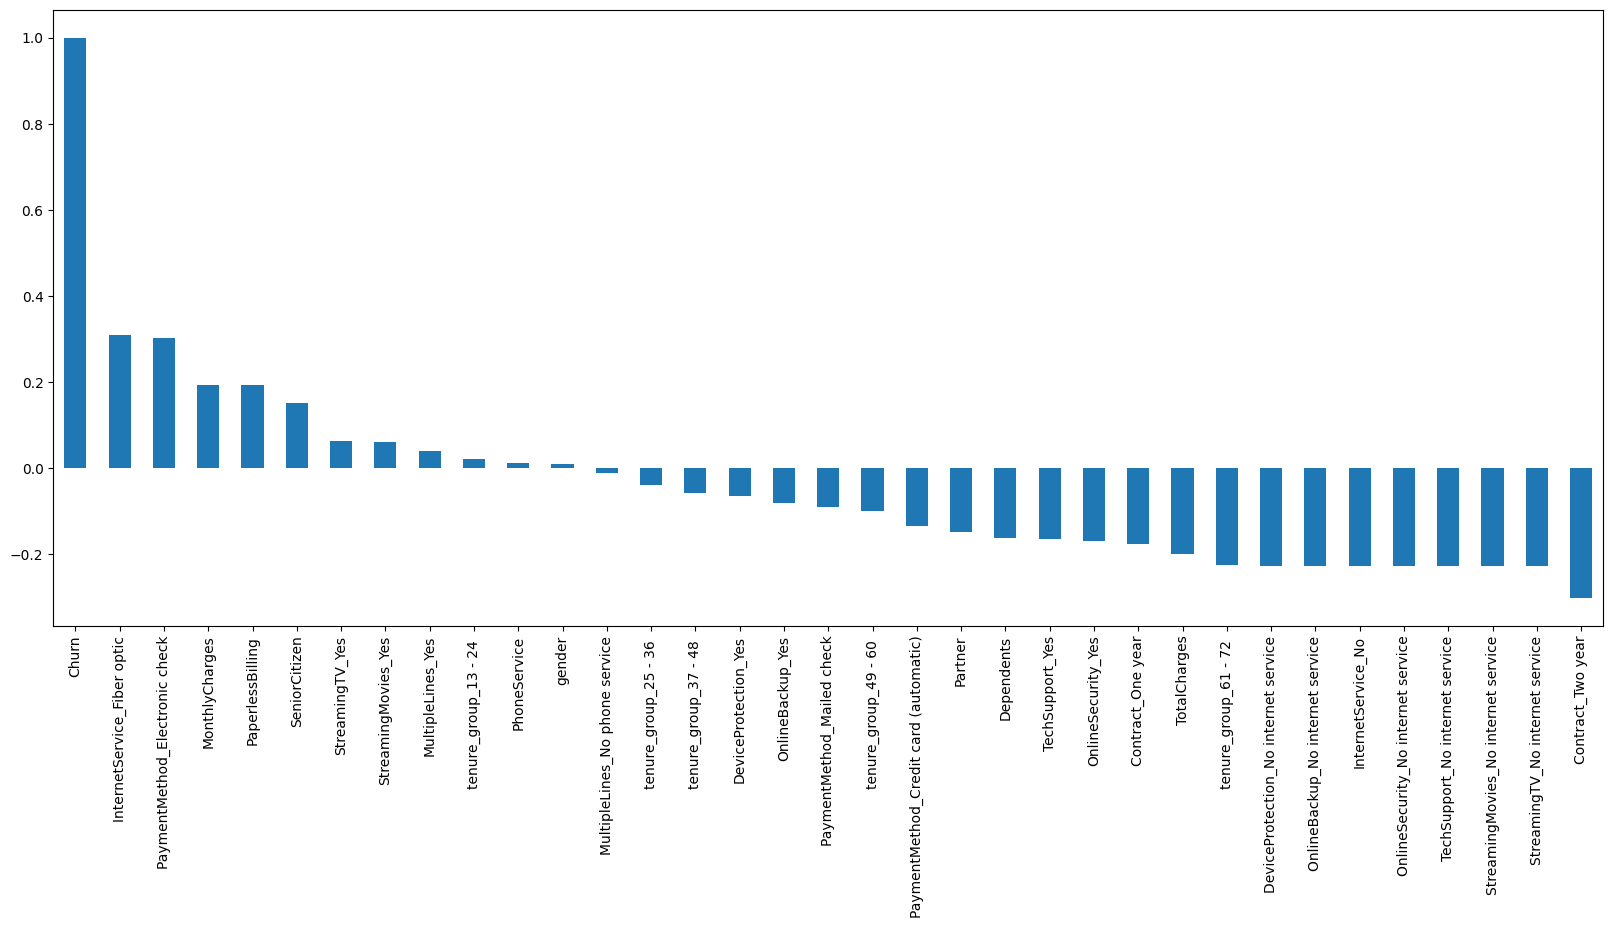

In [38]:
plt.figure(figsize=(20,8))
final_telco_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

## Derive insights
High Churn seen in case of Month to month contracts,No online security ,No Tech support,First year of subcription and fibre Opticcsc Internet

Low Churn is seens in case of Long term contracts,Subcriptions without internet service and The customers engaged for 5+ years


Factors like Gender,Availability of PhoneService of and number of multiple lines have almost no impact on Churn


<Axes: >

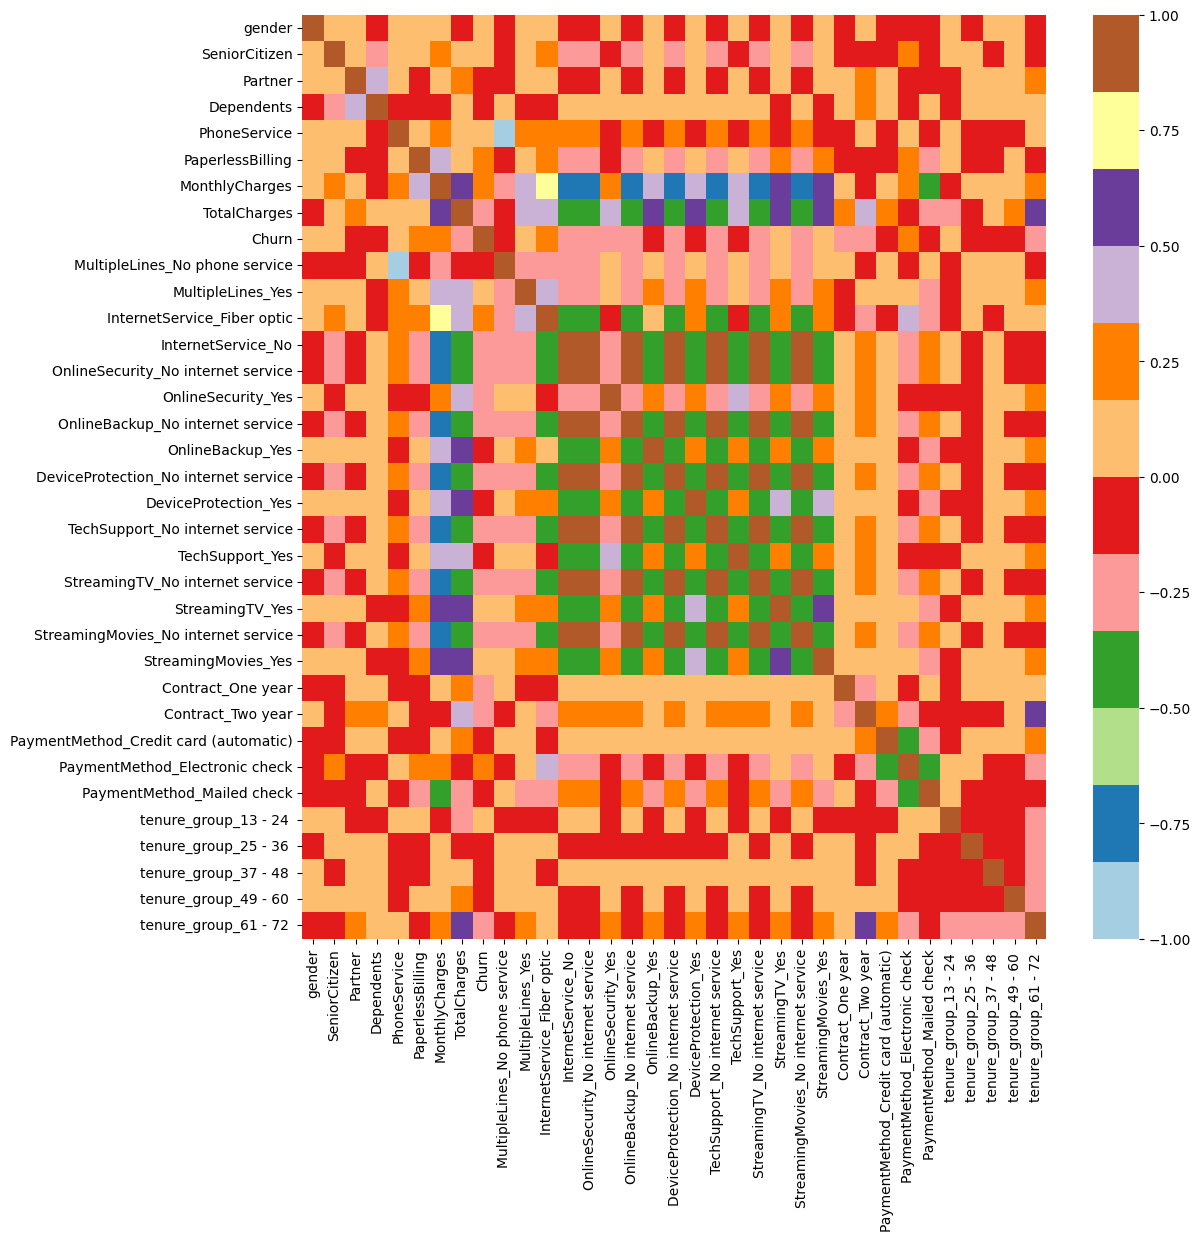

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(final_telco_data.corr(),cmap='Paired')

## Bivariate Analysis




In [57]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,1,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,0,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,0,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,0,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,1,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12


In [58]:
telco_data['gender'].value_counts()

gender
0    3549
1    3483
Name: count, dtype: int64

In [59]:
telco_data['Partner'].value_counts()

Partner
0    3639
1    3393
Name: count, dtype: int64

In [60]:
telco_data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [75]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

Text(0.5, 1.0, 'Distibution of Gender for nonchurned customer')

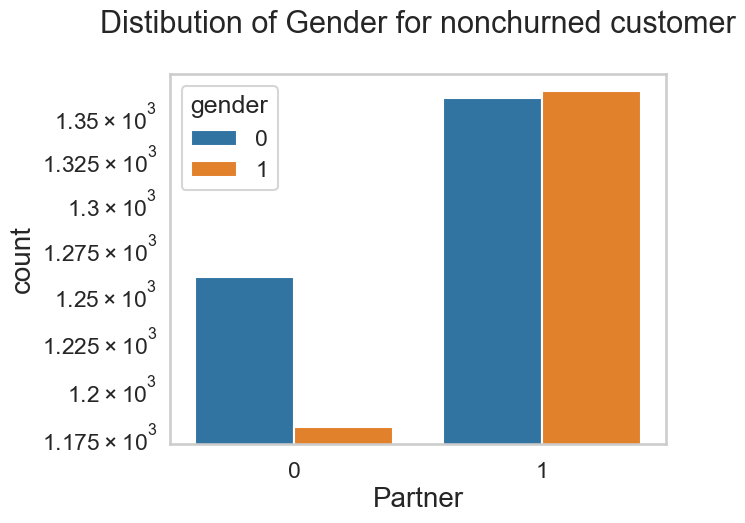

In [76]:
sns.countplot(data=new_df1_target0,x='Partner',hue='gender')
plt.yscale('log')
plt.title('Distibution of Gender for nonchurned customer')

Text(0.5, 1.0, 'Distribution of Gender of churned customer')

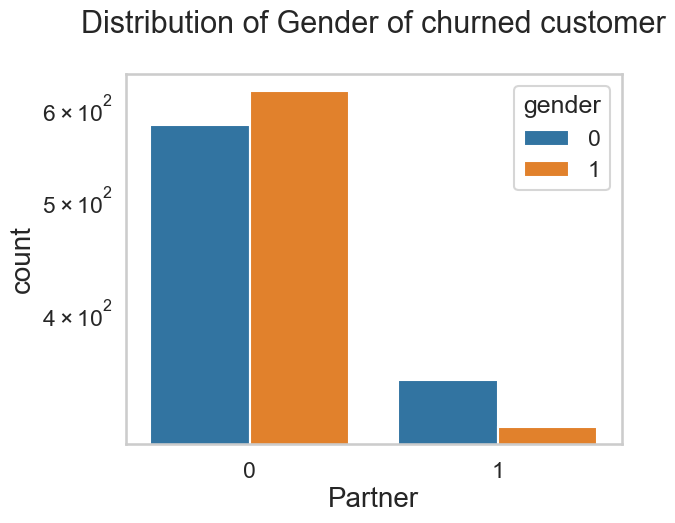

In [77]:
sns.countplot(data=new_df1_target1,x='Partner',hue='gender')
plt.yscale('log')
plt.title('Distribution of Gender of churned customer')

([0, 1, 2, 3],
 [Text(0, 0, 'Mailed check'),
  Text(1, 0, 'Electronic check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

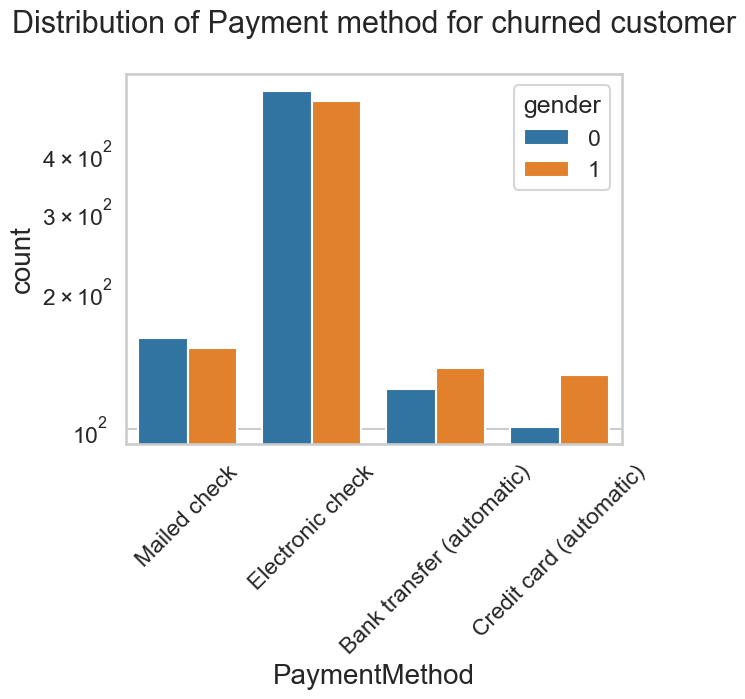

In [81]:
sns.countplot(data=new_df1_target1,x='PaymentMethod',hue='gender')
plt.yscale('log')
plt.title('Distribution of Payment method for churned customer')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of Contract for Churned Customer')

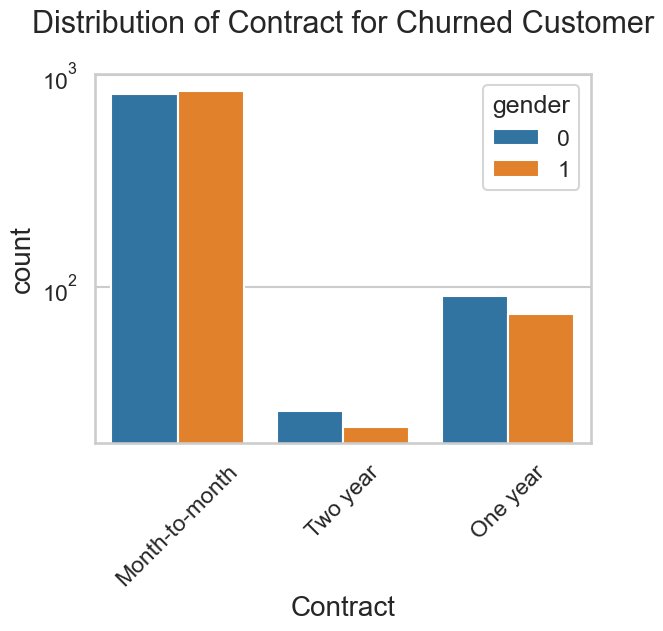

In [86]:
sns.countplot(data=new_df1_target1,x='Contract',hue='gender')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Distribution of Contract for Churned Customer')

Text(0.5, 1.0, 'Distribution of TechSupport for Churned Customer')

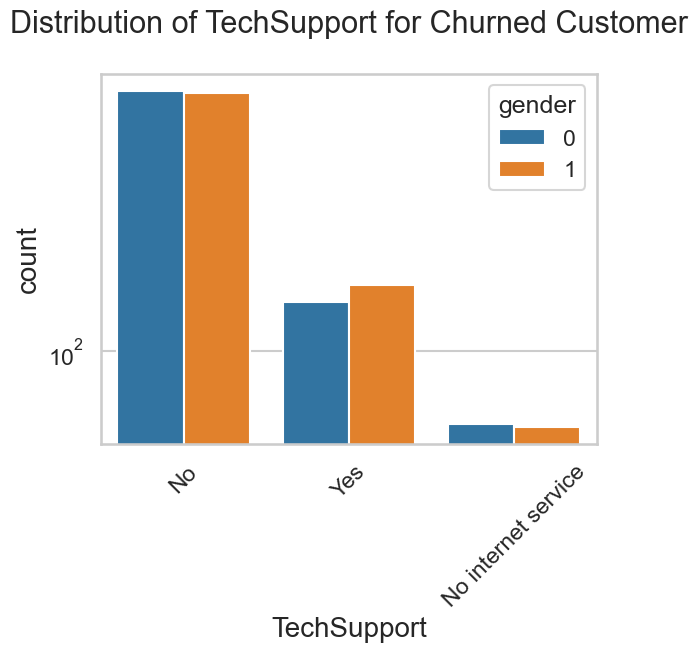

In [87]:
sns.countplot(data=new_df1_target1,x='TechSupport',hue='gender')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Distribution of TechSupport for Churned Customer')

Text(0.5, 1.0, 'Distribution of SeniorCitizen for Churned Customer')

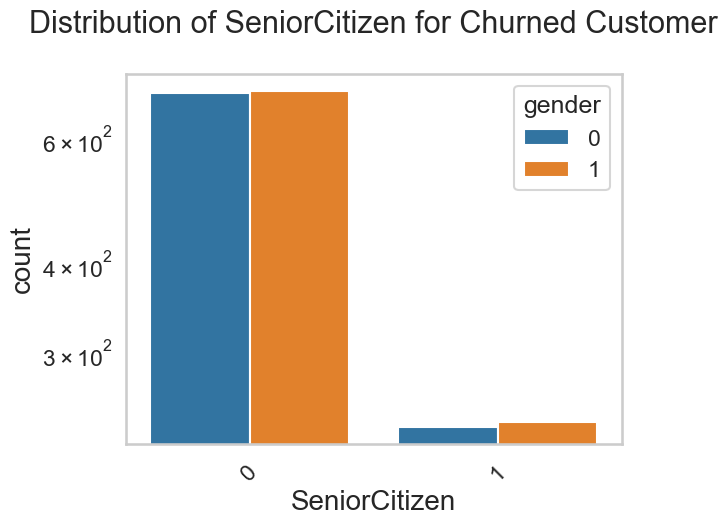

In [88]:
sns.countplot(data=new_df1_target1,x='SeniorCitizen',hue='gender')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Distribution of SeniorCitizen for Churned Customer')

## Conclusion

1.No partner are the highest churn

2.Electronic check medium ae the highest churnes

3.Contract tygpe-Montly customers are likely to churn beacause of no contract terms,as they arer free to ggo customers

4.No online security ,No tech support category are high churners

5.Non senior Citizens are high churners


In [89]:
final_telco_data.to_csv('tel_churn.csv')